In [1]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix
from imblearn.over_sampling import SMOTE

import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [2]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
bmi_median = dataset["bmi"].median()
dataset = dataset.fillna(bmi_median, inplace=False)

In [5]:
dataset['bmi'].fillna(dataset['bmi'].mean(), inplace=True)
dataset['smoking_status'].fillna(dataset['smoking_status'].mode()[0], inplace = True)

dataset.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
labels = dataset.pop("stroke")
labels

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [7]:
dataset_onehotted = pd.get_dummies(dataset)
dataset_onehotted.drop('id',axis=1,inplace=True)
dataset_onehotted['age'] = dataset_onehotted['age'].astype('float')
dataset_onehotted = dataset_onehotted.astype('float')
dataset_onehotted.head(3)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.6,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,28.1,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.5,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
from collections import Counter

In [9]:
smote = SMOTE()
dataset_resampled, labels_resampled = smote.fit_resample(dataset_onehotted, labels)

Counter(labels_resampled)

Counter({1: 4861, 0: 4861})

In [10]:
train_data, test_data, train_labels ,test_labels = train_test_split(dataset_resampled, labels_resampled, test_size=0.2)

print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")


Train Data Shape: (7777, 21)
Test Data Shape: (1945, 21)


In [11]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(use_label_encoder=True, objective="binary:logistic").fit(train_data, train_labels)

C:\Users\malco\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[14:43:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [12]:
def confusion_matrix(model, data, labels, subset="Train"):
    predicted = model.predict(data)
    accuracy = round(accuracy_score(labels, predicted)*100, 2)
    ax = plot_confusion_matrix(model, data, labels).ax_
    ax.set_title(f"{subset} Confusion Matrix\nAccuracy: {accuracy}%", fontsize=17)
    ax.set_xlabel("Predicted", fontsize=14)
    ax.set_ylabel("True", fontsize=14)

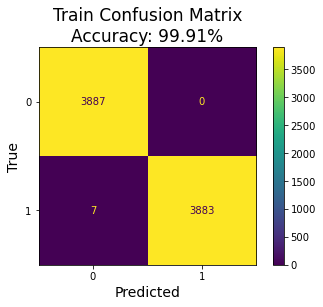

In [13]:
confusion_matrix(xgb_clf, train_data, train_labels)

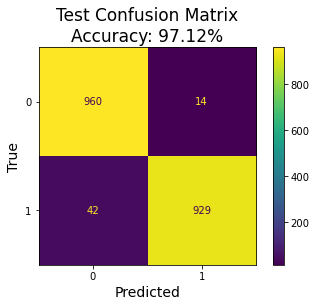

In [14]:
confusion_matrix(xgb_clf, test_data, test_labels, subset="Test")

In [20]:
train_data.to_csv('stroke-train-data.csv',index=False)
test_data.to_csv('stroke-test-data.csv',index=False)

In [27]:
xgb_clf.predict()

TypeError: Not supported type for data.<class 'dict'>

In [15]:
import joblib

In [16]:
joblib.dump(xgb_clf, 'stroke_prediction.joblib')

['stroke_prediction.joblib']

In [17]:
inp = test_data[:1]

In [18]:
clf = joblib.load('stroke_prediction.joblib')

In [27]:
inp.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'gender_Other', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [20]:
inp

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3201,80.0,0.0,0.0,94.96,22.1,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
payload = dict.fromkeys(inp.columns,0)

In [22]:
for x in inp.columns:
    payload[x] = {"0" : inp[x].values[0]}
payload

{'age': {'0': 80.0},
 'hypertension': {'0': 0.0},
 'heart_disease': {'0': 0.0},
 'avg_glucose_level': {'0': 94.96},
 'bmi': {'0': 22.1},
 'gender_Female': {'0': 0.0},
 'gender_Male': {'0': 1.0},
 'gender_Other': {'0': 0.0},
 'ever_married_No': {'0': 0.0},
 'ever_married_Yes': {'0': 1.0},
 'work_type_Govt_job': {'0': 0.0},
 'work_type_Never_worked': {'0': 0.0},
 'work_type_Private': {'0': 1.0},
 'work_type_Self-employed': {'0': 0.0},
 'work_type_children': {'0': 0.0},
 'Residence_type_Rural': {'0': 1.0},
 'Residence_type_Urban': {'0': 0.0},
 'smoking_status_Unknown': {'0': 0.0},
 'smoking_status_formerly smoked': {'0': 1.0},
 'smoking_status_never smoked': {'0': 0.0},
 'smoking_status_smokes': {'0': 0.0}}

In [23]:
payload = {
"age": {"0": 64},
"hypertension": {"0": 0},
"heart_disease": {"0": 0},
"avg_glucose_level": {"0": 62.21},
"bmi": {"0": 28.3},
"gender_Female": {"0": 0},
"gender_Male":{"0": 1},
"gender_Other":{"0": 0},
"ever_married_No": {"0": 0},
"ever_married_Yes": {"0": 1},
"work_type_Govt_job": {"0": 0},
"work_type_Never_worked": {"0": 0},
"work_type_Private": {"0": 1},
"work_type_Self-employed": {"0": 0},
"work_type_children": {"0": 0},
"Residence_type_Rural": {"0": 0},
"Residence_type_Urban": {"0": 1},
"smoking_status_Unknown": {"0": 1},
"smoking_status_formerly smoked": {"0": 0},
"smoking_status_never smoked": {"0": 0},
"smoking_status_smokes": {"0": 0}
}

In [24]:
inpp = pd.DataFrame(data=payload)

In [25]:
list(clf.predict_proba(inpp)[0])

[0.9164945, 0.08350551]

Model: Model 1

Micro F1-score on the Train data: 0.9985855728429985
Macro F1-score on the Train data: 0.9985855705043922
Weighted Average F1-score on the Train data: 0.9985855702705317
Accuracy on the Train data: 0.9985855728429985


Micro F1-score on the Test data: 0.9773778920308483
Macro F1-score on the Test data: 0.977375254587869
Weighted Average F1-score on the Test data: 0.9773753801803918
Accuracy on the Test data: 0.9773778920308483



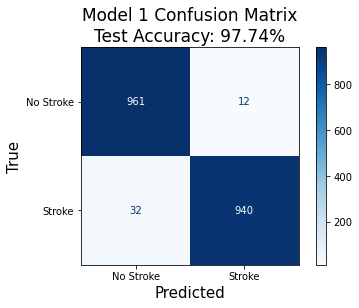

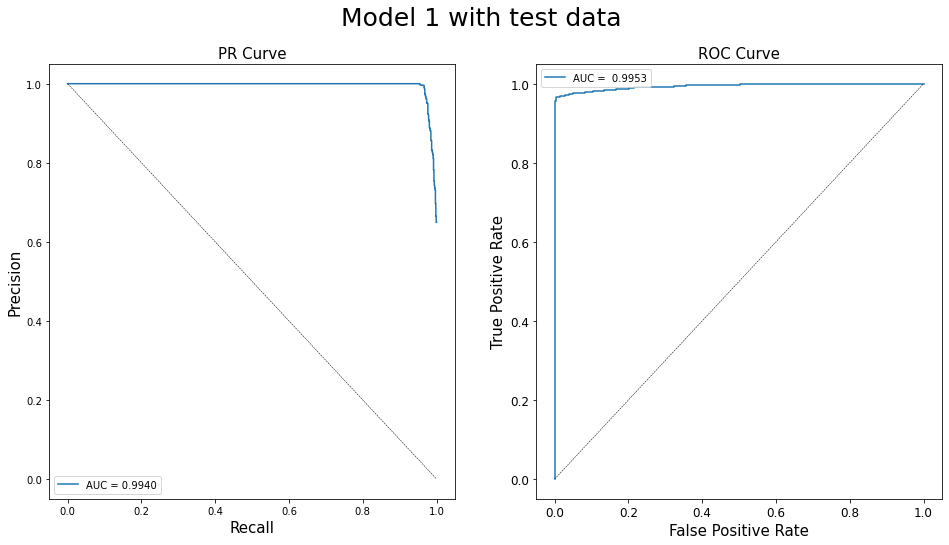

In [26]:
from class_eval import evaluate_classification

class_names = ["No Stroke", "Stroke"]
model_name = "Model 1"
evaluate_classification(
    clf,
    train_data,
    train_labels,
    test_data,
    test_labels,
    class_names,
    model_name,
)

In [30]:
model_file_name = "xgb-stroke-pred-model"
xgb_clf._Booster.save_model(model_file_name)

In [31]:
!tar czvf model.tar.gz $model_file_name

a xgb-stroke-pred-model
